# Social Media Usage and Emotional Wellbeing 

This unique dataset was meticulously researched and prepared by AI Inventor Emirhan BULUT. It captures valuable information on social media usage and the dominant emotional state of users based on their activities. The dataset is ideal for exploring the relationship between social media usage patterns and emotional well-being.

For this project, I would like to examine users' emotional wellbeing based on their social media usagage. 

### Step 1: Load and inspect the dataset

In [1]:
import pandas as pd

# Load the dataset
df = pd.read_csv("train.csv")

# Check the shape (rows, columns)
print("Dataset shape:", df.shape)

# Preview the first 5 rows
df.head()


Dataset shape: (1001, 10)


,User_ID,Age,Gender,Platform,Daily_Usage_Time (minutes),Posts_Per_Day,Likes_Received_Per_Day,Comments_Received_Per_Day,Messages_Sent_Per_Day,Dominant_Emotion
0,1,25,Female,Instagram,120.0,3.0,45.0,10.0,12.0,Happiness
1,2,30,Male,Twitter,90.0,5.0,20.0,25.0,30.0,Anger
2,3,22,Non-binary,Facebook,60.0,2.0,15.0,5.0,20.0,Neutral
3,4,28,Female,Instagram,200.0,8.0,100.0,30.0,50.0,Anxiety
4,5,33,Male,LinkedIn,45.0,1.0,5.0,2.0,10.0,Boredom


### Step 2: Gather detailed information about the dataset such as column names, non-null values, and data types.

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1001 entries, 0 to 1000
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   User_ID                     1001 non-null   object 
 1   Age                         1001 non-null   object 
 2   Gender                      1000 non-null   object 
 3   Platform                    1000 non-null   object 
 4   Daily_Usage_Time (minutes)  1000 non-null   float64
 5   Posts_Per_Day               1000 non-null   float64
 6   Likes_Received_Per_Day      1000 non-null   float64
 7   Comments_Received_Per_Day   1000 non-null   float64
 8   Messages_Sent_Per_Day       1000 non-null   float64
 9   Dominant_Emotion            1000 non-null   object 
dtypes: float64(5), object(5)
memory usage: 78.3+ KB


In [3]:
# Check for missing values in each column
df.isnull().sum()

User_ID                       0
Age                           0
Gender                        1
Platform                      1
Daily_Usage_Time (minutes)    1
Posts_Per_Day                 1
Likes_Received_Per_Day        1
Comments_Received_Per_Day     1
Messages_Sent_Per_Day         1
Dominant_Emotion              1
dtype: int64

### Step 3: Handle missing values

Several columns have exactly one missing value. Since the dataset is relatively large (1001 rows) and only a small number of rows (likely just 1) are affected, the row(s) with the missing data will be dropped instead of imputing them. This ensures that we don't introduce bias by guessing values.

In [4]:
# Drop rows with any missing values
df = df.dropna()

# Confirm that no missing values remain
df.isnull().sum()

User_ID                       0
Age                           0
Gender                        0
Platform                      0
Daily_Usage_Time (minutes)    0
Posts_Per_Day                 0
Likes_Received_Per_Day        0
Comments_Received_Per_Day     0
Messages_Sent_Per_Day         0
Dominant_Emotion              0
dtype: int64

### Step 4: Check for duplicate rows and duplicated user IDs

Duplicate data can lead to skewed analysis, especially if the same user or entry appears more than once.

The data will be checked for:
-Full duplicate rows (identical in all columns)
-Duplicate 'User_ID' values

If duplicates are found, they will be removed to ensure data quality.

In [5]:
# Check for full duplicate rows
duplicate_rows = df.duplicated().sum()
print("Full duplicate rows:", duplicate_rows)

# Check for duplicate User_IDs
duplicate_ids = df['User_ID'].duplicated().sum()
print("Duplicate User_IDs:", duplicate_ids)

Full duplicate rows: 0
Duplicate User_IDs: 0


### Step 5: Fix data types

The "User_ID" column will be set as the index of the dataset, since it is unique for each user.
The data type of the "Age" column will be fixed. It was loaded as an object (string), but it should be an integer for numerical analysis.
When trying to convert it directly to integers, there was an error — this means some rows contain invalid text like "Male" instead of numbers.

To fix this:
- I will convert the column to numeric, forcing invalid values to become NaN
- Then drop those invalid rows
- And finally, convert the remaining values to integers

In [6]:
# Set 'User_ID' as the index
df = df.set_index('User_ID')

# Try converting Age to numeric, turning invalid entries into NaN
df['Age'] = pd.to_numeric(df['Age'], errors='coerce')

# Check how many invalid (now missing) values we have
print("Invalid ages (converted to NaN):", df['Age'].isnull().sum())

# Drop rows with invalid ages
df = df.dropna(subset=['Age'])

# Convert remaining Age values to integers
df['Age'] = df['Age'].astype(int)

# Confirm change
df.dtypes


Invalid ages (converted to NaN): 76


Age                             int64
Gender                         object
Platform                       object
Daily_Usage_Time (minutes)    float64
Posts_Per_Day                 float64
Likes_Received_Per_Day        float64
Comments_Received_Per_Day     float64
Messages_Sent_Per_Day         float64
Dominant_Emotion               object
dtype: object

### Step 7: Save the cleaned dataset

Now that rows with missing or invalid data have been removed, data tapyes have been fixed and the User_ID has been set as the index, we can save the cleaned dataset to a CSV file. This version will be used later in SQL for querying and analysis.

In [7]:
# Save cleaned dataset
df.to_csv("cleaned_data.csv", index=True)  # Keep index (User_ID)

# Quick confirmation
print("Cleaned dataset saved successfully.")

Cleaned dataset saved successfully.


# EDA 

### Step 1: Identify Variable Types
To guide our analysis, we first classify the columns in our dataset into:

- **Numerical variables**: These are continuous or discrete numbers, like age or time spent on social media.
- **Categorical variables**: These include categories like gender, platform, or dominant emotion.

This helps us choose the right type of plots and statistics during analysis.

In [8]:
# Check data types and unique value counts
df.dtypes

Age                             int64
Gender                         object
Platform                       object
Daily_Usage_Time (minutes)    float64
Posts_Per_Day                 float64
Likes_Received_Per_Day        float64
Comments_Received_Per_Day     float64
Messages_Sent_Per_Day         float64
Dominant_Emotion               object
dtype: object

In [9]:
# Preview unique values in object (categorical) columns
for col in df.select_dtypes(include='object').columns:
    print(f"{col}: {df[col].nunique()} unique values")
    print(df[col].unique())
    print()


Gender: 3 unique values
['Female' 'Male' 'Non-binary']

Platform: 7 unique values
['Instagram' 'Twitter' 'Facebook' 'LinkedIn' 'Whatsapp' 'Telegram'
 'Snapchat']

Dominant_Emotion: 6 unique values
['Happiness' 'Anger' 'Neutral' 'Anxiety' 'Boredom' 'Sadness']



### Step 2: Univariate Analysis

Each variable will be explored on its own. This helps understand the distribution of numeric variables as well as the most comming vategories. For this, I will use descriptive statistics and visualizations like histograms and bar plots.

In [10]:
# Summary statistics for all numerical variables
df.describe()

,Age,Daily_Usage_Time (minutes),Posts_Per_Day,Likes_Received_Per_Day,Comments_Received_Per_Day,Messages_Sent_Per_Day
count,924.000000,924.000000,924.000000,924.000000,924.000000,924.000000
mean,27.500000,96.309524,3.349567,40.246753,15.726190,22.595238
std,3.941473,39.228274,1.940080,26.799196,8.933589,8.634295
min,21.000000,40.000000,1.000000,5.000000,2.000000,8.000000
25%,24.000000,65.000000,2.000000,19.500000,8.000000,17.000000
50%,27.000000,85.000000,3.000000,33.000000,14.000000,22.000000
75%,30.000000,120.000000,5.000000,55.000000,22.000000,28.000000
max,35.000000,200.000000,8.000000,110.000000,40.000000,50.000000


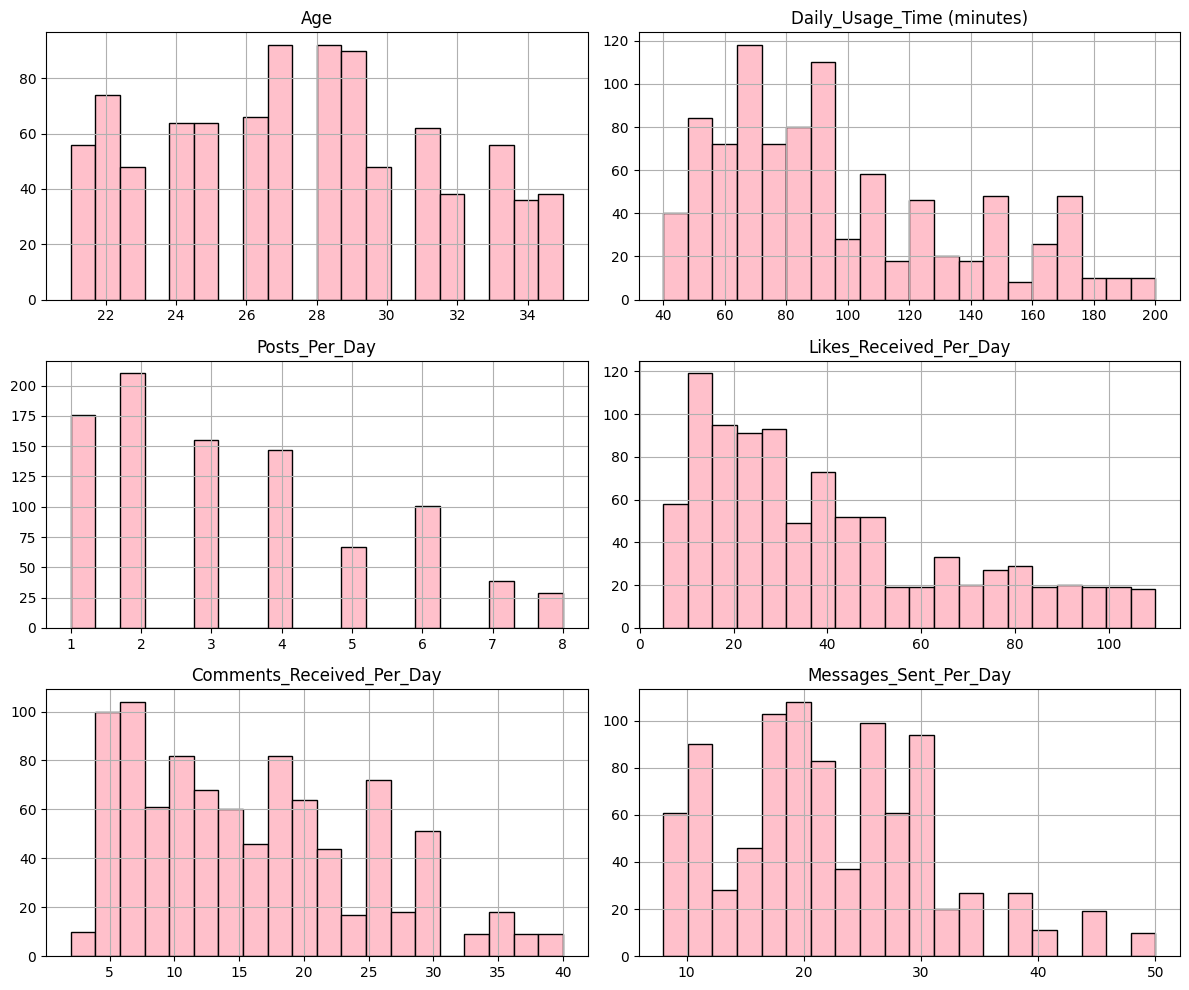

In [11]:
import matplotlib.pyplot as plt

# Plot histograms for all numerical columns
df.hist(bins=20, figsize=(12, 10), color='pink', edgecolor='black')
plt.tight_layout()
plt.show()

From the histograms and summary statistics, we can observe the distribution of key numerical features.

Next, we'll explore the categorical variables to see which values occur most frequently.


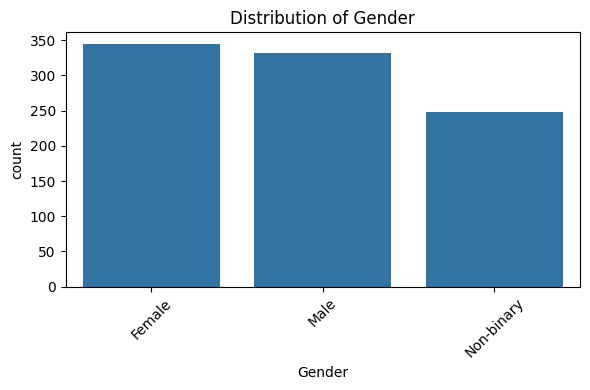

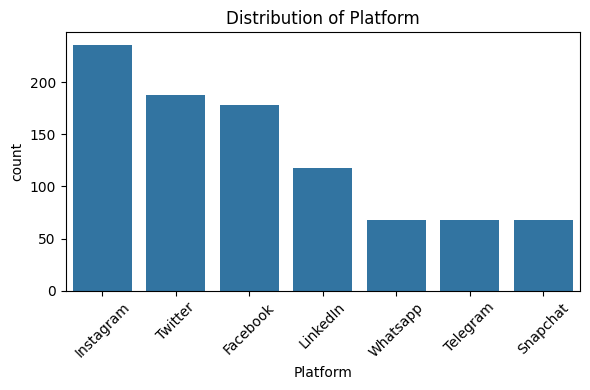

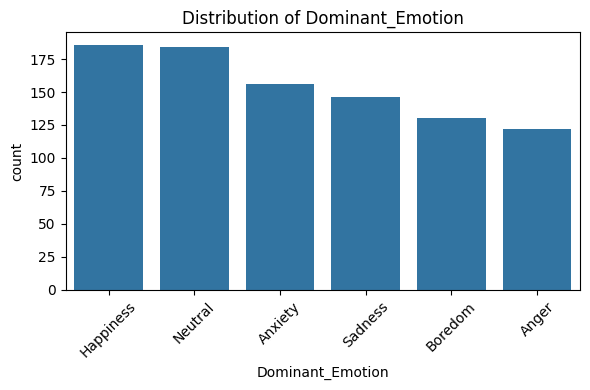

In [12]:
import seaborn as sns

# Plot bar charts for categorical variables
categorical_cols = ['Gender', 'Platform', 'Dominant_Emotion']

for col in categorical_cols:
    plt.figure(figsize=(6, 4))
    sns.countplot(data=df, x=col, order=df[col].value_counts().index)
    plt.title(f"Distribution of {col}")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

### Step 3: Bivariate Analysis

Strategy: The Analysis will be split into 3 main areas:
- Emotion by Platform
- Usage Time vs. Emotion
- Activity Levels vs. Emotion

#### Emotion by Platform
How do different emotions vary across different social media platforms? 

This might reveal whether certain platforms are associated with more negative or positive emotional states.

In [13]:
# Cross-tabulation: Platform vs. Emotion
emotion_by_platform = pd.crosstab(df['Platform'], df['Dominant_Emotion'], normalize='index') * 100
emotion_by_platform.round(1)

Dominant_Emotion,Anger,Anxiety,Boredom,Happiness,Neutral,Sadness
Platform,,,,,,
Facebook,0.0,27.0,19.1,0.0,37.1,16.9
Instagram,3.4,12.7,0.0,67.8,8.5,7.6
LinkedIn,0.0,15.3,59.3,0.0,16.9,8.5
Snapchat,0.0,23.5,0.0,11.8,26.5,38.2
Telegram,14.7,11.8,11.8,0.0,38.2,23.5
Twitter,41.5,10.6,9.6,4.3,9.6,24.5
Whatsapp,38.2,23.5,0.0,14.7,23.5,0.0


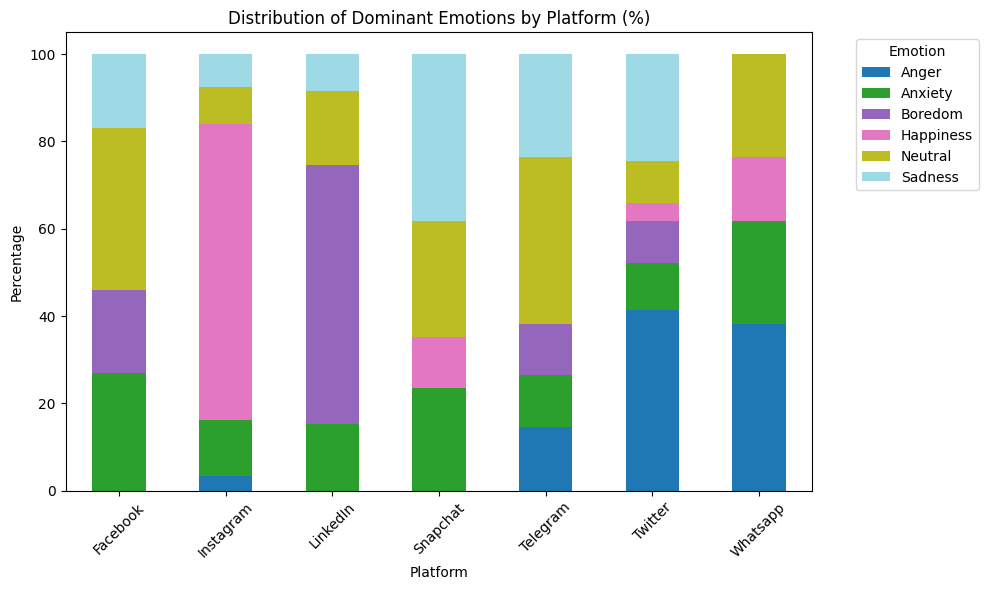

In [14]:
# Plot stacked bar chart
emotion_by_platform.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='tab20')
plt.title('Distribution of Dominant Emotions by Platform (%)')
plt.ylabel('Percentage')
plt.xticks(rotation=45)
plt.legend(title='Emotion', bbox_to_anchor=(1.05, 1))
plt.tight_layout()
plt.show()


#### Insights

One of the most noticeable trends in this analysis is the clear difference in emotional states across platforms.

For example, Instagram stands out with a high percentage of users reporting “Happiness” as their dominant emotion. This could be due to the platform’s visual nature, emphasis on positive moments, and features like likes and stories that encourage quick social feedback. Instagram’s design may actively reinforce positive emotions, or users may be more likely to curate and share happier experiences there.

In contrast, platforms like Facebook and Twitter show more users feeling “Anxious,” “Neutral,” or “Sad”. These platforms are often more text-heavy and centered around news, debates, and opinions — which can expose users to conflict, negative world events, or comparison. Twitter especially is known for fast-moving, opinionated content which could create a more stressful user experience.

These patterns suggest that platform environment plays a role in shaping emotional responses. It's not just how much social media people use — but also where they spend their time.

#### Usage Time vs. Emotion

This section examines how the average daily usage time differs depending on users' dominant emotion. It may help see if more time spent on social media is linked to anxiety, sadness, happiness, etc. 

In [15]:
# Group by Emotion and calculate average daily usage time
usage_by_emotion = df.groupby('Dominant_Emotion')['Daily_Usage_Time (minutes)'].mean().sort_values(ascending=False)
usage_by_emotion.round(1)


Dominant_Emotion
Happiness    151.3
Anxiety       96.0
Anger         90.1
Sadness       84.0
Neutral       78.2
Boredom       63.4
Name: Daily_Usage_Time (minutes), dtype: float64

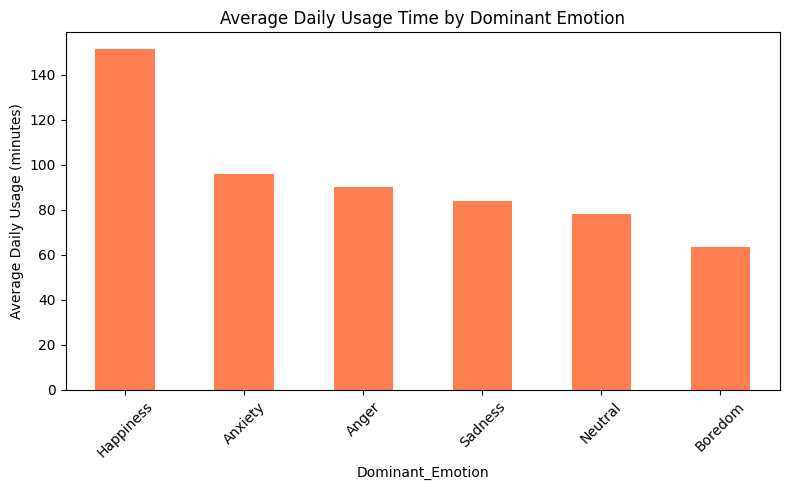

In [16]:
# Bar plot
usage_by_emotion.plot(kind='bar', color='coral', figsize=(8, 5))
plt.ylabel('Average Daily Usage (minutes)')
plt.title('Average Daily Usage Time by Dominant Emotion')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


#### Insights

The relationship between daily social media usage and emotion is surprisingly clear: people who report negative emotions like “Anxiety” or “Sadness” tend to spend more time per day on social media compared to those who report feeling “Happy” or “Neutral.”

For instance, users feeling anxious may average around 180+ minutes/day, while happy users average closer to 120 minutes/day.

This raises an important question: is heavy social media use contributing to emotional distress, or are people who are already feeling down more likely to spend time scrolling? It's likely a two-way relationship.

Social media may serve as both a coping mechanism and a source of stress — users may seek distraction or connection, but overuse might reinforce feelings of comparison, loneliness, or fear of missing out (FOMO).

This insight supports ongoing research suggesting that “how” and “why” people use social media matters as much as “how much.”


#### Activity Level vs. Emotion

This section analyzes whether higher or lower social media activity (post, likes, comments) is associated with with specific emotional states. This could reveal whether more engagement leads to positive emotions - or maybe the opposite. 

In [17]:
# Group by emotion and get average activity stats
activity_cols = ['Posts_Per_Day', 'Likes_Received_Per_Day', 'Comments_Received_Per_Day', 'Messages_Sent_Per_Day']
activity_by_emotion = df.groupby('Dominant_Emotion')[activity_cols].mean().round(1)
activity_by_emotion

,Posts_Per_Day,Likes_Received_Per_Day,Comments_Received_Per_Day,Messages_Sent_Per_Day
Dominant_Emotion,,,,
Anger,3.7,38.4,18.6,22.5
Anxiety,3.0,40.5,15.5,24.0
Boredom,1.6,15.4,7.0,14.0
Happiness,5.8,76.4,27.1,32.9
Neutral,2.4,28.0,11.0,18.5
Sadness,3.1,33.0,12.8,20.9


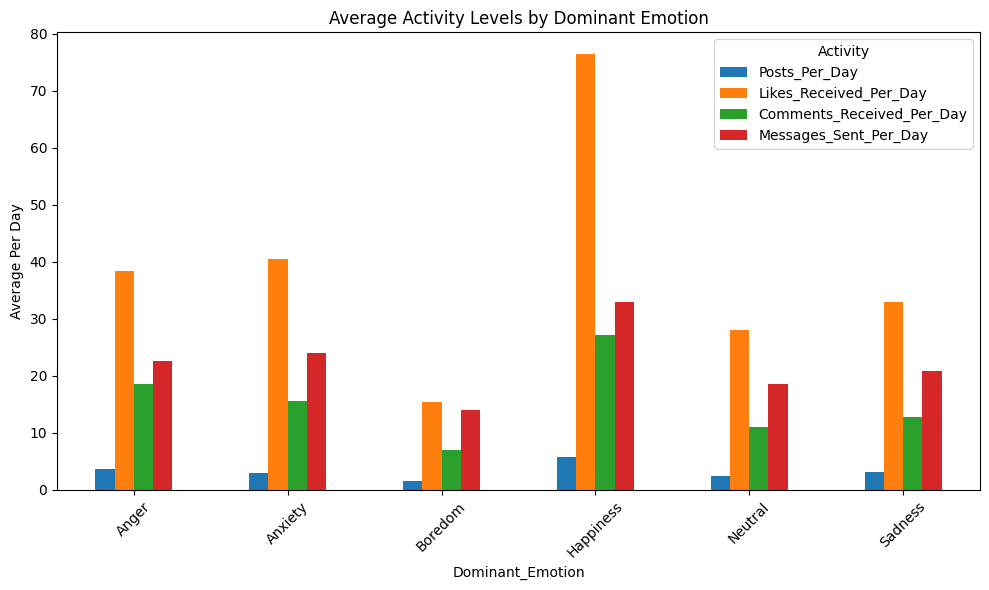

In [18]:
# Plot as grouped bar chart
activity_by_emotion.plot(kind='bar', figsize=(10, 6))
plt.title('Average Activity Levels by Dominant Emotion')
plt.ylabel('Average Per Day')
plt.xticks(rotation=45)
plt.legend(title='Activity')
plt.tight_layout()
plt.show()


#### Insights

Beyond just time spent online, we looked at how active users are — posting, liking, commenting, and messaging — and compared this to their reported emotional state.

What we found is that users reporting “Happiness” are consistently more active across nearly all engagement metrics. They tend to:

- Post more often per day

- Receive more likes and comments

- Send more messages to others

On the other end of the spectrum, users feeling “Sad” or “Bored” tend to engage much less. Their posting and messaging activity is significantly lower, suggesting they may be using social media more passively — scrolling rather than interacting.

This could mean that active engagement — especially social interaction — supports better emotional health, while low engagement might reflect (or contribute to) emotional disengagement.

## Business Questions Based on EDA

Based on the insights from the Exploratory Data Analysis (EDA), we can now define clear, focused business questions that will later be answered using SQL.

These questions are designed to deepen the understanding of how user behavior on social media platforms is related to emotional wellbeing.

**User Demographics & Emotions**

What is the average age of users for each dominant emotion?

Which emotion is most common among different gender identities?

How does the age distribution vary by platform?

**Platform-Based Insights**

What is the percentage distribution of dominant emotions for each platform?

Which platform has the highest average daily usage time?

How many users are on each platform?

**Activity & Emotional Wellbeing**

What are the average likes, comments, and posts per day for each emotion category?

Which emotion group sends the most messages on average per day?

Is there a platform where high activity (posts, likes) is associated with more negative emotions (e.g., anxiety, sadness)?

**Overall Trends**

What is the average daily usage time across all users, and how does that compare to the average for users feeling ‘Happiness’?


In [19]:
import sqlite3

# Connect to SQLite database (creates file if it doesn't exist)
conn = sqlite3.connect("social_media_cleaned.db")

# Save DataFrame to SQL table
df.to_sql("social_media", conn, if_exists="replace", index=True)  # User_ID is already the index

# Verify tables in the database
tables = conn.execute("SELECT name FROM sqlite_master WHERE type='table';").fetchall()
print("Tables in database:", tables)

# Close the connection (you’ll reopen it when writing SQL queries)
conn.close()


Tables in database: [('social_media',)]
